Wikipedia Mining
Kelvin Yeh

As the finance world becomes increasingly available to everyday people, so to does the volume of equities and derivatives being traded each day. One such derivative, options contracts, has been especially popular amongst retail traders. We will use data extraction and analysis tools to gain insight from the Wikipedia page on options.

ref: https://en.wikipedia.org/wiki/Option_(finance)

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://en.wikipedia.org/wiki/Option_(finance)'
response = requests.get(url)

In [3]:
soup = BeautifulSoup(response.text, 'html.parser')
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Option (finance) - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
title = soup.find('h1').text
print(f'Title: {title}')

Title: Option (finance)


In [6]:
# Extract the introduction section
intro_paragraphs = []
for element in soup.find("div", {"class": "mw-parser-output"}).find_all(['p', 'h2']):
    if element.name == 'h2':
        break  # Stop if we reach the first section header
    intro_paragraphs.append(element.text)

# Join all paragraphs to form the complete introduction
intro = "\n".join(intro_paragraphs)
print("Introduction:", intro)

# Generated using GPT-4o mini

Introduction: 

In finance, an option is a contract which conveys to its owner, the holder, the right, but not the obligation, to buy or sell a specific quantity of an underlying asset or instrument at a specified strike price on or before a specified date, depending on the style of the option. 

Options are typically acquired by purchase, as a form of compensation, or as part of a complex financial transaction. Thus, they are also a form of asset (or contingent liability) and have a valuation that may depend on a complex relationship between underlying asset price, time until expiration, market volatility, the risk-free rate of interest, and the strike price of the option. 

Options may be traded between private parties in over-the-counter (OTC) transactions, or they may be exchange-traded in live, public markets in the form of standardized contracts.



In [7]:
# Find all section headers in the HTML document, specifically looking for h2, h3, and h4 tags
sections = soup.find_all(['h2', 'h3', 'h4'])

# Print a header for the output to indicate that section titles will follow
print('Section titles:')

# Iterate over each section found in the previous step
for section in sections:
    # Get the text of the current section header, stripping any leading or trailing whitespace
    section_title = section.get_text(strip=True)
    
    # Print the section title to the console
    print(section_title)

# Generated using GPT-4o mini
# Figure out how to store the section titles into a list

Section titles:
Contents
Definition and application
History
Historical uses of options
Modern stock options
Contract specifications
Option trading
Forms of trading
Exchange-traded options
Over-the-counter options
Exchange trading
Basic trades (American style)
Long call
Long put
Short call
Short put
Options strategies
Types
According to the option rights
According to the delivery type
According to the underlying assets
Other option types
Option styles
Valuation
Basic decomposition
Valuation models
Black–Scholes
Stochastic volatility models
Short-rate models
Model implementation
Analytic techniques
Binomial tree pricing model
Monte Carlo models
Finite difference models
Other models
Risks
Standard hedge parameters
Pin risk
Counterparty risk
Options approval levels
Options exchanges
Chicago Board Options Exchange (CBOE)
NASDAQ OMX PHLX
International Securities Exchange (ISE)
Eurex Exchange
Tokyo Stock Exchange (TSE)
See also
References
Further reading


In [8]:
# Define the section titles you want to extract
desired_sections = [
    "Definition and application",
    "Historical uses of options",
    "Modern stock options",
    "References"
    # Add more section titles as needed
]

# Find all sections in the page
sections = soup.find_all(['h2', 'h3', 'h4'])  # h2 for main sections, h3 and h4 for subsections

# Initialize a list to store the extracted section titles and contents
extracted_content = []

for section in sections:
    # Get the section title
    title = section.get_text(strip=True)
    
    # Check if the title is in the desired sections
    if title in desired_sections:
        print(f'Section Title: {title}')
        
        # Get the next sibling elements until the next section title
        content = []
        for sibling in section.find_all_next():
            if sibling.name in ['h2', 'h3', 'h4']:
                break  # Stop if we reach the next section title
            
            # Collect text from paragraphs and lists
            if sibling.name in ['p', 'ul', 'ol']:
                content.append(sibling.get_text(strip=True))

        # Store the section title and content in the list
        extracted_content.append((title, '\n'.join(content) if content else 'No content available.'))
        
        # Print the section content
        print('Section Content:')
        print('\n'.join(content) if content else 'No content available.')
        print('-' * 40)  # Separator for readability

# Generated using GPT-4o mini

Section Title: Definition and application
Section Content:
An option is a contract that allows the holder the right to buy or sell an underlying asset or financial instrument at a specified strike price on or before a specified date, depending on the form of the option. Selling or exercising an option before expiry typically requires a buyer to pick the contract up at the agreed upon price. The strike price may be set by reference to thespot price(market price) of the underlying security or commodity on the day an option is issued, or it may be fixed at a discount or at a premium. The issuer has the corresponding obligation to fulfill the transaction (to sell or buy) if the holder "exercises" the option. An option that conveys to the holder the right to buy at a specified price is referred to as acall, while one that conveys the right to sell at a specified price is known as aput.
The issuer may grant an option to a buyer as part of another transaction (such as a share issue or as part

In [9]:
from textblob import TextBlob

# Process each section with TextBlob
for title, text in extracted_content:
    blob = TextBlob(text)
    print(f'Section Title: {title}')
    print(f'Sentiment: {blob.sentiment}')
    print('-' * 40)  # Separator for readability

Section Title: Definition and application
Sentiment: Sentiment(polarity=0.07319047619047618, subjectivity=0.45142857142857146)
----------------------------------------
Section Title: Historical uses of options
Sentiment: Sentiment(polarity=0.08432539682539683, subjectivity=0.40383597883597894)
----------------------------------------
Section Title: Modern stock options
Sentiment: Sentiment(polarity=0.07142857142857144, subjectivity=0.2619047619047619)
----------------------------------------
Section Title: References
Sentiment: Sentiment(polarity=0.08041666666666666, subjectivity=0.195)
----------------------------------------


In [10]:
external_links = soup.find_all('a', {'class':'external text'})
print('External links:')
for link in external_links:
    print(link.get('href'))

External links:
http://www.investopedia.com/articles/optioninvestor/10/history-options-futures.asp
https://web.archive.org/web/20160729024723/http://fan.zhang.gl/ecref/options
http://fan.zhang.gl/ecref/options
https://www.theocc.com/getmedia/a151a9ae-d784-4a15-bdeb-23a029f50b70/riskstoc.pdf;
http://www.cme.com/trading/
https://web.archive.org/web/20070511003741/http://www.iseoptions.com/products_traded.aspx
http://www.iseoptions.com/products_traded.aspx
http://news.cnet.com/Google+unveils+unorthodox+stock+option+auction/2100-1030_3-6143227.html
http://invest-faq.com/cbc/deriv-option-basics.html
http://www.wfu.edu/~palmitar/Law&Valuation/chapter%204/4-4-1.htm
https://www.cboe.com/LearnCenter/pdf/understanding.pdf
https://web.archive.org/web/20110725103707/http://www.ericbenhamou.net/documents/Encyclo/Pre%20Black-Scholes.pdf
https://doi.org/10.1086%2F260062
https://www.jstor.org/stable/1831029
https://api.semanticscholar.org/CorpusID:154552078
http://www.journals.uchicago.edu/JPE/
https:

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

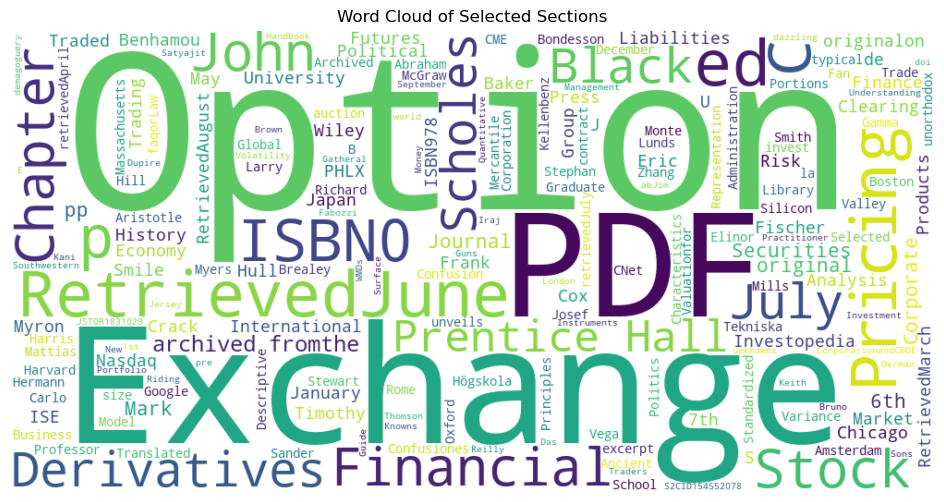

In [12]:
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Selected Sections')
plt.show()

The Wikipedia article on options delivers a neutral and objective source of information. This is expected and consistent with an encyclopedia-type publication. The word cloud shows the most frequently occuring words in the selection sections and the context of the sections is on-topic.